In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('companies_no_subindustry.csv')
pd.set_option('display.max_rows', None)
df['included'] = pd.to_datetime(df['included'], errors='coerce')

# Count the number of rows where 'included' column is missing or empty
num_missing_included = df['included'].isna().sum()

print(f"Number of companies with missing or empty 'included' date: {num_missing_included}")

Number of companies with missing or empty 'included' date: 308


In [ ]:
df['included'] = pd.to_datetime(df['included'], dayfirst=True, errors='coerce')
df['Founded'] = pd.to_datetime(df['Founded'].str.extract(r'(\d{4})'), errors='coerce')
df.dropna(subset=['included'], inplace=True)
df['Age'] = df['included'].dt.year - df['Founded'].dt.year
oldest_constituent = df.loc[df['Age'].idxmin()]
youngest_constituent = df.loc[df['Age'].idxmax()]
average_age = df['Age'].mean()
print(oldest_constituent)
print(youngest_constituent)
print(f"\nAverage Age of a Constituent: {average_age:.2f} years")
#Error(

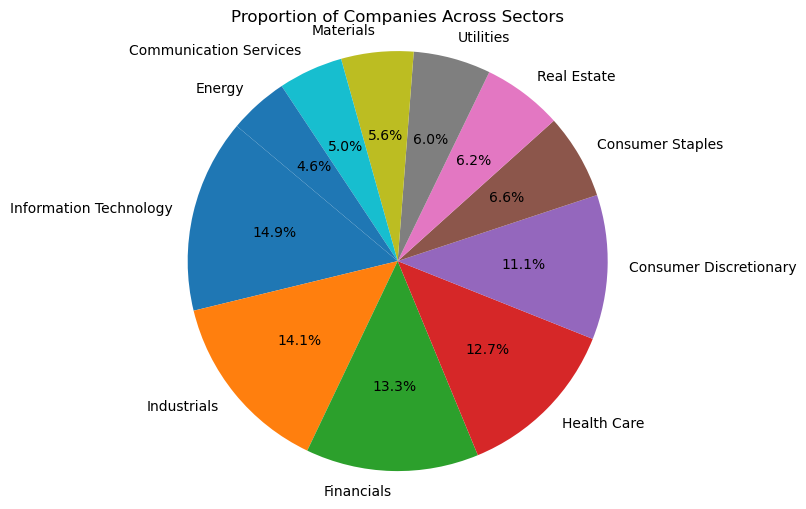

In [14]:
sector_counts = df['GICS_Sector'].value_counts()

plt.figure(figsize=(8, 6))
sector_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Companies Across Sectors')
plt.ylabel('')  
plt.axis('equal') 
plt.show()

In [15]:
df['State'] = df['hq'].apply(lambda x: x.split(', ')[-1])
state_distribution = df['State'].value_counts()
print("Distribution of States:")
print(state_distribution)

Distribution of States:
State
California                             70
New York                               55
Texas                                  45
Illinois                               33
Massachusetts                          22
Pennsylvania                           20
Ohio                                   19
Georgia                                17
North Carolina                         16
Virginia                               16
Florida                                15
New Jersey                             15
Minnesota                              14
Washington                             13
Connecticut                            13
Michigan                               12
Ireland                                 8
Wisconsin                               7
Arizona                                 7
Indiana                                 7
Maryland                                7
Tennessee                               7
Colorado                                7
Miss

In [11]:
df.head()

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-09-08,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",NaT,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",NaT,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",NaT,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",NaT,1981
